# Tutorial 2 - Bank decision loan problem with fuzzy inputs

This tutorial uses the fuzzy inference system developed in Tutorial 1.

In [1]:
import os
import warnings

os.chdir('/workspaces/fuzzy-expert')
warnings.filterwarnings("ignore")


## Specification of the fuzzy inference system

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference

variables = {
    "score": FuzzyVariable(
        universe_range=(150, 200),
        terms={
            "High": [(175, 0), (180, 0.2), (185, 0.7), (190, 1)],
            "Low": [(155, 1), (160, 0.8), (165, 0.5), (170, 0.2), (175, 0)],
        },
    ),
    "ratio": FuzzyVariable(
        universe_range=(0.1, 1),
        terms={
            "Goodr": [(0.3, 1), (0.4, 0.7), (0.41, 0.3), (0.42, 0)],
            "Badr": [(0.44, 0), (0.45, 0.3), (0.5, 0.7), (0.7, 1)],
        },
    ),
    #
    "credit": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Goodc": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
            "Badc": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
        },
    ),
    #
    "decision": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Approve": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
            "Reject": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
        },
    ),
}

rules = [
    FuzzyRule(
        premise=[
            ("score", "High"),
            ("AND", "ratio", "Goodr"),
            ("AND", "credit", "Goodc"),
        ],
        consequence=[("decision", "Approve")],
    ),
    FuzzyRule(
        premise=[
            ("score", "Low"),
            ("AND", "ratio", "Badr"),
            ("OR", "credit", "Badc"),
        ],
        consequence=[("decision", "Reject")],
    )
]

model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)



## Computation with fuzzy inputs

Fuzzy inputs are specified as a list of points (x, u), where x is a point in the universe of discourse and u is the corresponding value of the membership function. In the first case, the fuzziness of inputs are considered; however, values are according with an approval decision. 

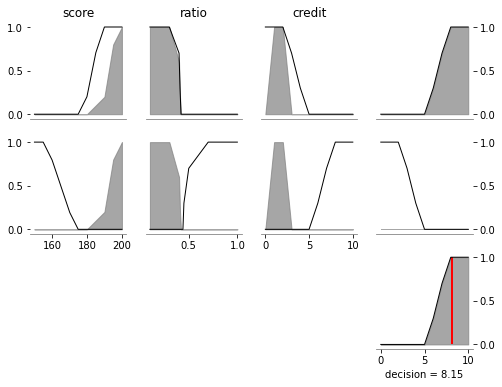

In [3]:
plt.figure(figsize=(10,6))

model.plot(
    variables=variables,
    rules=rules,
    score=[(180, 0.0), (190, 0.2), (195, 0.8), (200, 1.0)],
    ratio=[(0.1, 1), (0.3, 1), (0.4, 0.6), (0.41, 0.2),  (0.42, 0)],
    credit=[(0, 0), (1, 1), (2, 1), (3, 0.0), (4, 0.0)],
)

In the second case, the values are clearly related to a reject decision.

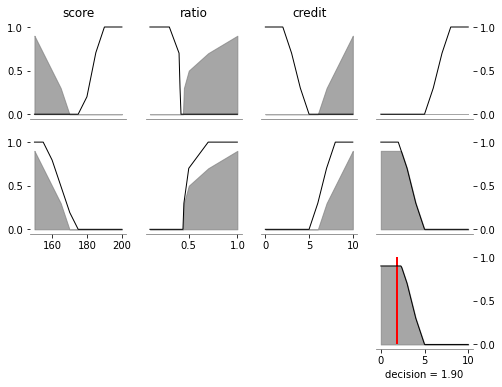

In [10]:
plt.figure(figsize=(10,6))

model.plot(
    variables=variables,
    rules=rules,
    score=[(150, 0.9), (155, 0.7), (160, 0.5), (165, 0.3), (170, 0.0)],
    ratio=[(0.44, 0), (0.45, 0.3), (0.5, 0.5), (0.7, 0.7),  (1, 0.9)],
    credit=[(6, 0), (7, 0.3), (8, 0.5), (9, 0.7), (10, 0.9)],
)

In the third case, two variables have good values and the third a bad value, causing indetermination in the result.

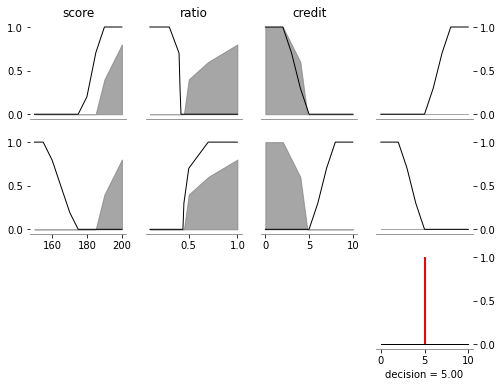

In [13]:
plt.figure(figsize=(10,6))

model.plot(
    variables=variables,
    rules=rules,
    score=[(185, 0.0), (190, 0.4), (195, 0.6), (200, 0.8)],
    ratio=[(0.45, 0), (0.5, 0.4), (0.7, 0.6), (1, 0.8)],
    credit=[(2, 1), (3, 0.8), (4, 0.6), (4.8, 0.0)],
)